In [1]:
import matplotlib as mpl
import pandas as pd
import matplotlib.patches as mpatches
import AnalysisFunctions

%run OrderAndLabel.py
%run percentagesClassData.py

In [58]:
width = 4
mpl.rc('figure', figsize=(width*1.618, width))
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
mpl.rcParams.update({'text.usetex': False,
                     'mathtext.fontset': 'cm',
                     'font.family' : 'serif',
                     'mathtext.fontset' : 'dejavuserif',
                     'lines.linewidth': 3,
                     'lines.markersize': 10,
                     'font.size': 12,
#                      'axes.grid': True,
#                      'grid.alpha': 0.3,
                     'legend.loc': 'best',
                     'figure.dpi': 800, 
                     #'pdf.compression': 9,
                    "figure.facecolor": "white"
                    }
                     )

#### Prepare the data for the proportions plots

In [3]:
#Calculate the Class proportions
####
# need to change the  calc_proportions           #
# function to take the updated labels or update  #
# thee mark dictionary to match the new numbers  #
####

no_CIs = 3

# Term 2
CI_Proportions_Pre = calc_proportions(dfScores_Pre, no_CIs, Marks_Pre)
CI_Proportions_Post = calc_proportions(dfScores_Post, no_CIs, Marks_Post)


# Item Difficulty Test - P
Ding 2006 - the ratio of the number of correct responses on the question to the total number who attempted the question. A value >0.9 too easy, < 0.3 too difficult

### All Data

In [19]:
P_Pre = item_diffifulty_single_test(dfScores_Pre, Marks_Pre, True)
P_Post = item_diffifulty_single_test(dfScores_Post, Marks_Post, True)

### Classes

In [20]:
P_C1_Pre = item_diffifulty_single_test(C1_Pre_Scores, Marks_Pre, True)#False)
P_C1_Post = item_diffifulty_single_test(C1_Post_Scores, Marks_Post, True)#False)



## Item discrimination index - D
Ding 2006 - a measure of the discriminatory power of each item in a test. values in range of -1 to +1, with anything >0.2 acceptable. 

### All Data


In [21]:
quartile = 50

In [22]:
D_Pre = Item_discrimination(dfScores_Pre, Marks_Pre, quartile)
D_Post = Item_discrimination(dfScores_Post, Marks_Post, quartile)

### Classes

In [23]:
D_C1_Pre_T2 = Item_discrimination(C1_Pre_Scores, Marks_Pre, quartile)
D_C1_Post_T2 =  Item_discrimination(C1_Post_Scores, Marks_Post, quartile)


### By Trial

### Point Biserial Coefficient
Ding - is a measure of consistency of a single test item with the whole test. It reflects the correla- tion between students’ scores on an individual item and their scores on the entire test, and is basically a form of the cor- relation coefficient.

### All data

In [34]:
PB_Pre = PointBiserial(dfScores_Pre, Marks_Pre, P_Pre)
PB_Post = PointBiserial(dfScores_Post, Marks_Post, P_Post)

### By Class

In [35]:
PB_C1_Pre = PointBiserial(C1_Pre_Scores, Marks_Pre, P_C1_Pre)
PB_C1_Post = PointBiserial(C1_Post_Scores, Marks_Post, P_C1_Post)


### Cronbach Alpha - use SPSS instead

### Means of Stats

In [27]:
# All Data
P_Pre_Mean = P_Pre.mean()
P_Post_Mean = P_Post.mean()

Difficulty_Means = ['Difficulty', P_Pre_Mean, P_Post_Mean]

#By Classes
# P_C1_Pre_Mean = P_C1_Pre.mean()
# P_C1_Post_Mean = P_C1_Post.mean()

# Difficulty_Means = ['Difficulty', P_C1_Pre_Mean, P_C1_Post_Mean]

In [28]:
# All Data
D_Pre_Mean = D_Pre[D_Pre>0].mean()
D_Post_Mean = D_Post[D_Post>0].mean()

Discrimination_Means = ['Discrimination', D_Pre_Mean, D_Post_Mean]

# # By Classes
# D_C1_Pre_Mean = D_C1_Pre[D_C1_Pre>0].mean()
# D_C1_Post_Mean = D_C1_Post[D_C1_Post>0].mean()

# Discrimination_Means = ['Discrimination', D_C1_Pre_Mean, D_C1_Post_Mean]

In [37]:
# By Classes
PB_Pre_Mean = PB_Pre.mean()
PB_Post_Mean = PB_Post.mean()

Biserial_Means = ['Biserial', PB_Pre_Mean, PB_Post_Mean]

# # By Classes
# PB_C1_Pre_Mean = PB_C1_Pre.mean()
# PB_C1_Post_Mean = PB_C1_Post.mean()

# Biserial_Means = ['Biserial', PB_C1_Pre_Mean, PB_C1_Post_Mean]


In [38]:
def Total_Scores_Only(data):
    Score = (data.sum(axis = 1) - data['Total score'])
    fraction = Score/(len(data.columns)-1)
    percentage = fraction*100
    
    return percentage

In [39]:
Total_Scores_Only(C1_Pre_Scores).mean()

26.785714285714285

In [41]:
Test_Means = ['Means', Total_Scores_Only(C1_Pre_Scores).mean(),
             Total_Scores_Only(C1_Post_Scores).mean()]


In [42]:
Test_Medians = ['Medians', Total_Scores_Only(C1_Pre_Scores).median(),
             Total_Scores_Only(C1_Post_Scores).median()]


In [43]:
Test_STD = ['STD', Total_Scores_Only(C1_Pre_Scores).std(),
             Total_Scores_Only(C1_Post_Scores).std()]


In [44]:
Test_Gain = ['Gain', avg_norm_gain(Test_Means[1], Test_Means[2])]

In [45]:
RowsTests = ['','C1 Pre', 'C1 Post']

In [46]:
DataArray = [RowsTests, Difficulty_Means, Discrimination_Means, Biserial_Means]
DataArray2 = [RowsTests, Test_Means, Test_Medians, Test_STD, Test_Gain] # Test_Tvalue, Test_Tvalue_significance,

In [47]:
workbook = xlsxwriter.Workbook(r'DataSummaryStateTrialsClasses.xlsx')
worksheet = workbook.add_worksheet()

row = 0

for col, data in enumerate(DataArray2):
    worksheet.write_column(row,col,data)
workbook.close()

In [48]:
workbook = xlsxwriter.Workbook(r'ReliabilityStatsClasses.xlsx')
worksheet = workbook.add_worksheet('Means')

row = 0

for col, data in enumerate(DataArray):
    worksheet.write_column(row,col,data)
workbook.close()

## Statistical Validity Tests

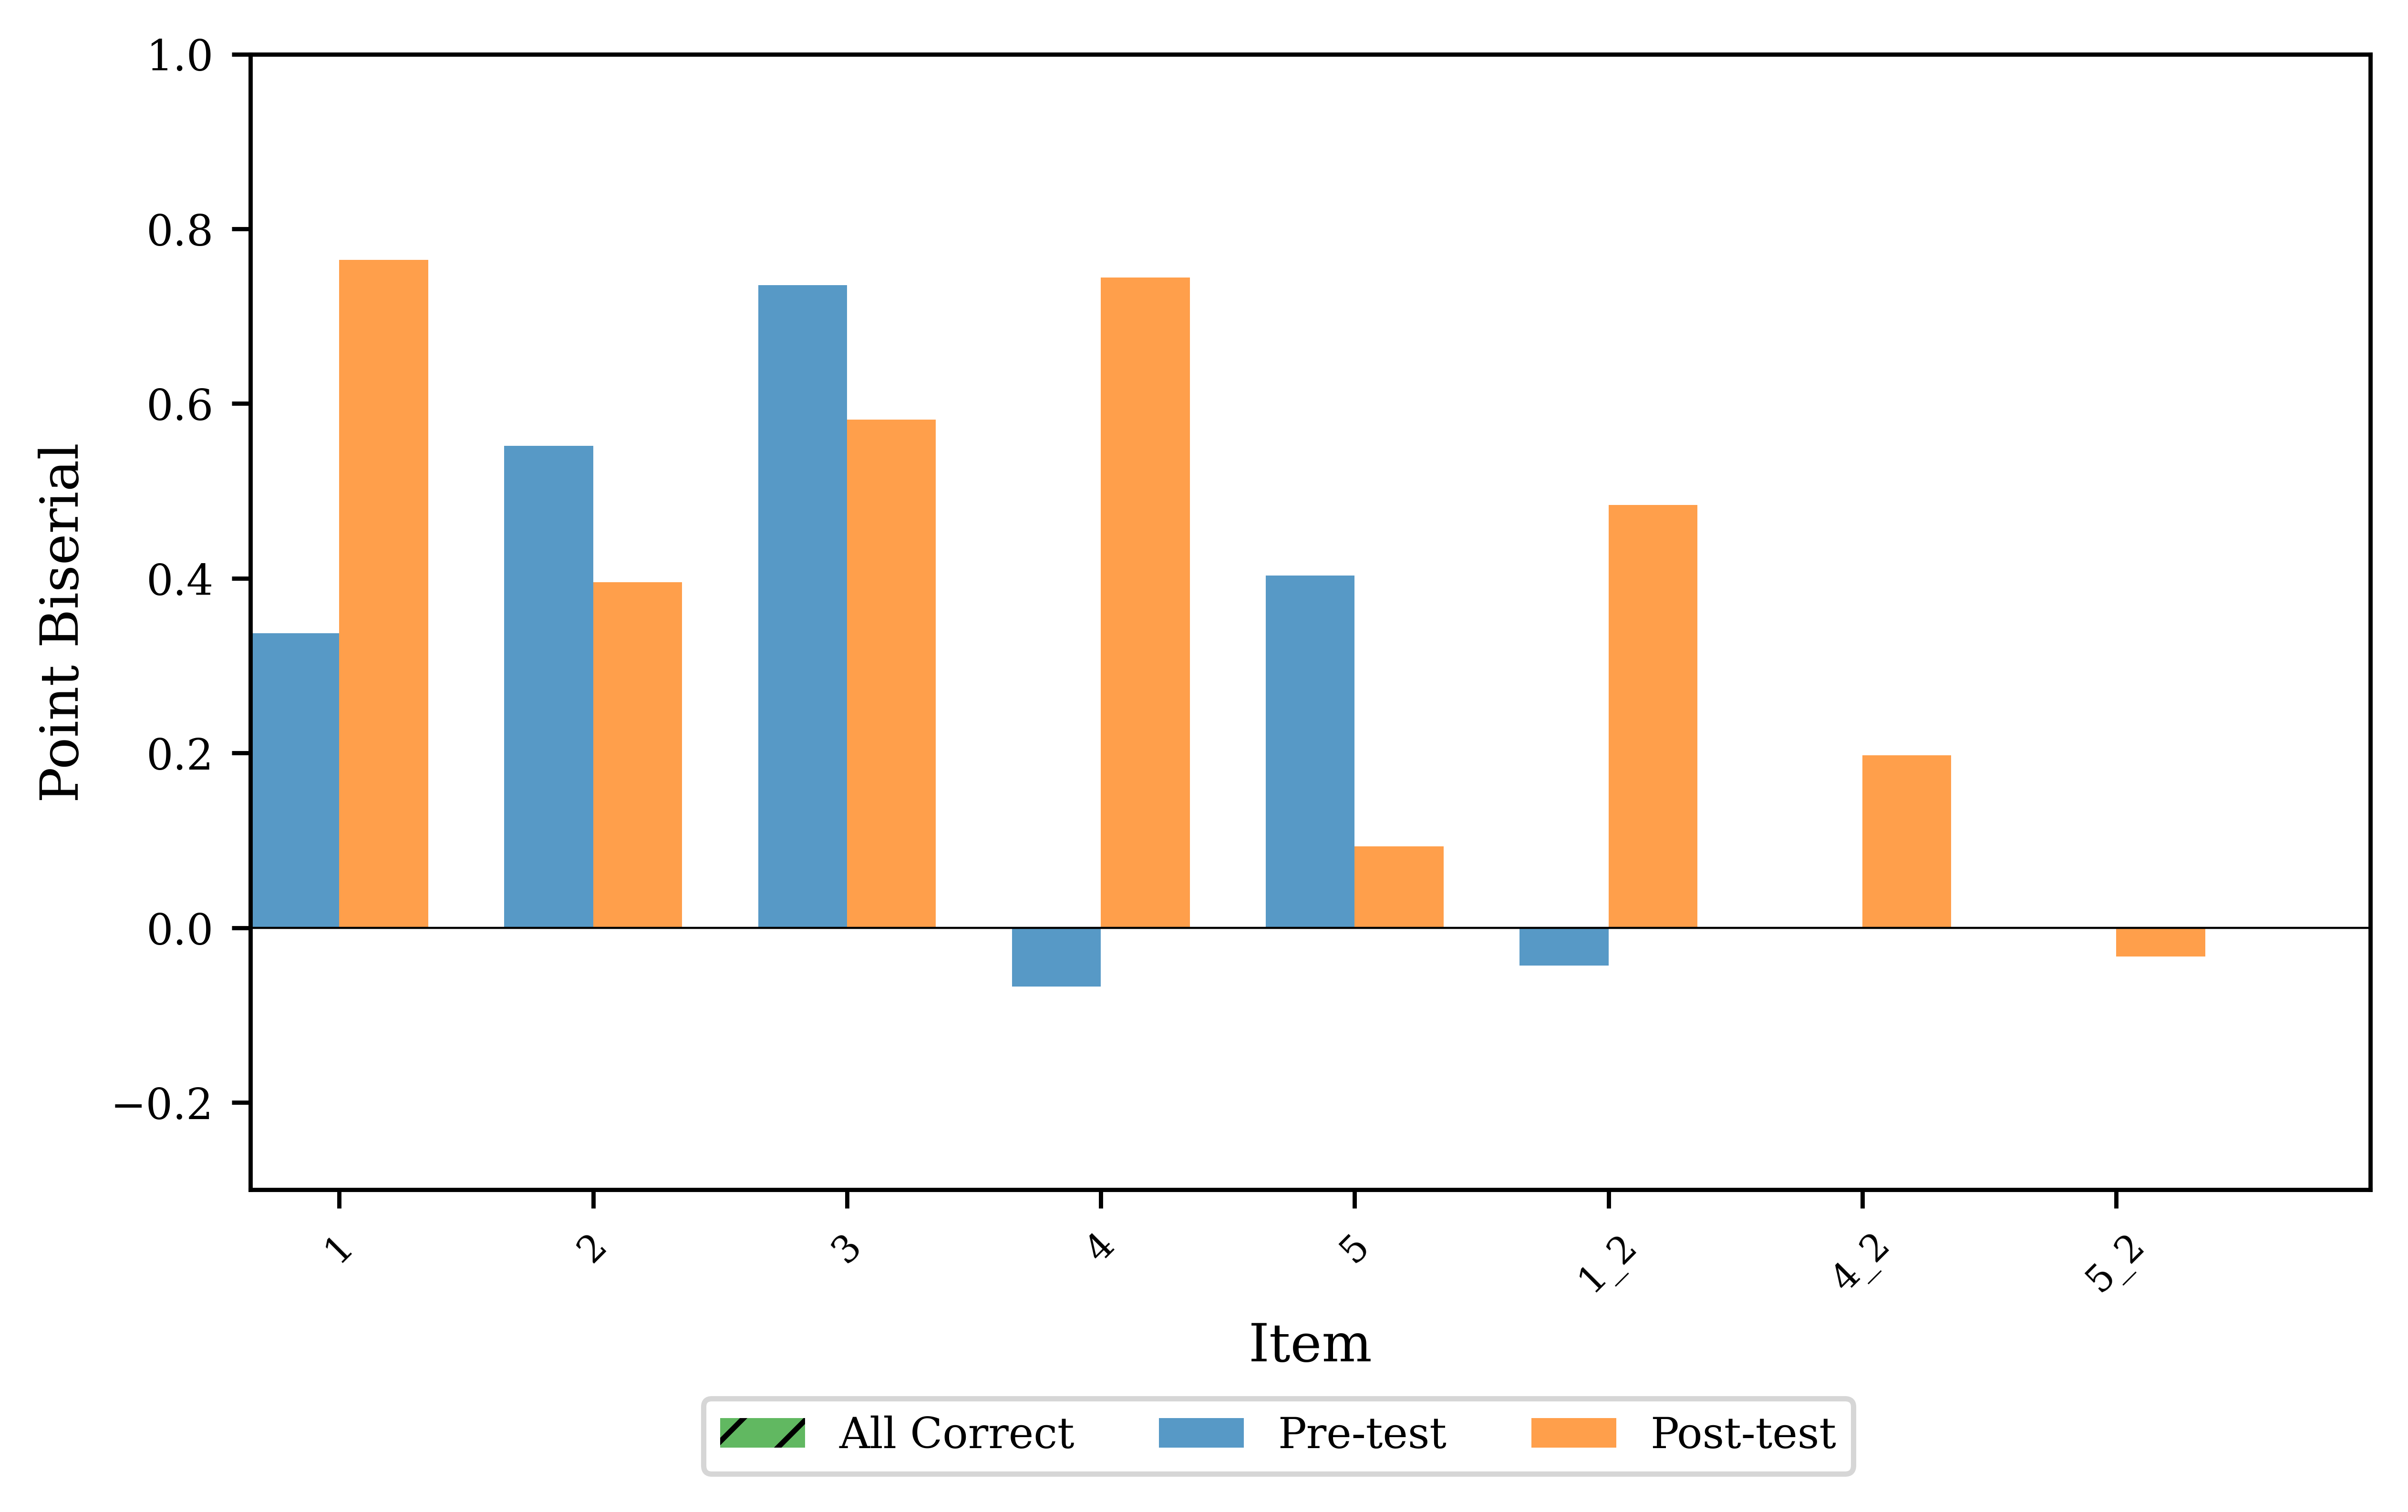

In [65]:
fig, ax = plt.subplots()
Label = 'Point Biserial'#+str(quartile)
C1DataPre = PB_Pre
C1DataPost = PB_Post


PB = True
Disc = False#True

greenPatch = mpatches.Patch(facecolor='C2', alpha = 0.75, hatch = r'//')
# C1
# ax.fill_between([len(C1DataPost)-2.65,len(C1DataPost)+.35], -0.5, 1, color = 'C7', alpha = 0.15, linewidth = 0.01)


if Disc == True:
    Diff_One_Pre = P_Pre
    Diff_One_Post = P_Post
    
    NanCol = ax.bar(Diff_One_Pre.index, Diff_One_Pre.mask(Diff_One_Pre<1,0), width = -0.35, align = 'edge', alpha = 0.5, color = 'C2', label = 'Full', hatch = '/')
    NanCol = ax.bar(Diff_One_Post.index, Diff_One_Post.mask(Diff_One_Post<1,0), width = 0.35, align = 'edge', alpha = 0.75, color = 'C2', label = 'Full', hatch = '/')
    
if PB == True:
    NanPre = C1DataPre.fillna(2)
    NanPost = C1DataPost.fillna(2)

    NanCol = ax.bar(NanPre.index, NanPre.mask(NanPre<2, 0), width = -0.35, align = 'edge', alpha = 0.5, color = 'C2', label = 'Nan', hatch = '/')
    NanCol = ax.bar(NanPost.index, NanPost.mask(NanPost<2, 0), width = 0.35, align = 'edge', alpha = 0.75, color = 'C2', label = 'Nan', hatch = '/')

pre = ax.bar(C1DataPre.index, C1DataPre, width = -0.35, align = 'edge', alpha = 0.75, color = 'C0', label = 'Pre')
post = ax.bar(C1DataPost.index, C1DataPost, width = 0.35, align = 'edge', alpha = 0.75,color = 'C1', label = 'Post')

# ax.set_title(f'Class 1', size = 12)
ax.set_xlim(-0.35, len(C1DataPost))
# ax.text(len(C1DataPost)-2.6, 1.05, 'Post Only', color = 'C7', fontsize = 8)

# ax[0,0].hlines(0.3, -0.35, len(C1DataPost), linestyles = 'dashed', linewidth = 0.3, color = 'k')


ax.set_ylim(-0.3,1)
#     a.set_ylim(-1,1)
ax.set_yticks([ -0.2, 0, 0.2 ,0.4, 0.6, 0.8, 1.0])
ax.tick_params(axis='x', which='both', labelsize=7, rotation = 45)
ax.tick_params(axis = 'y', which = 'both', labelsize = 8)
ax.hlines(0, -0.35,30, 'k', linewidth = 0.4)

ax.set_ylabel(Label, size = 10)
ax.set_xlabel('Item', size = 10)


plt.tight_layout()
fig.subplots_adjust(bottom=0.2)#, right = 0.82)
if (PB == True) or (Disc == True):
    fig.legend(handles = [greenPatch, pre, post], labels = ['All Correct','Pre-test','Post-test'],
               loc = 'lower center', bbox_to_anchor = [0.53,0], fontsize = 8, markerscale = 0.1,ncol = 3)
    
else:
    fig.legend(handles = [pre, post], labels = ['Pre-test','Post-test'],loc = 'lower center', bbox_to_anchor = [0.53, 0], fontsize = 8, markerscale = 0.1,ncol = 2)

    # leg = ax[0,0].get_legend()
# leg.legend_handles[0].set_colour('C0')

Export = 'N'
if Export == 'Y':
    plt.savefig('Plots/Discrimination_Index_L.jpg', format = 'jpg', transparent = 'False')

In [ ]:
fig, ax = plt.subplots(2,2)
Label = 'Difficulty Index'#+str(quartile)
C1DataPre = P_Pre
C1DataPost = D_Post


PB = False#True
Disc = False

greenPatch = mpatches.Patch(facecolor='C2', alpha = 0.75, hatch = r'//')
# C1
ax[0,0].fill_between([len(C1DataPost)-2.65,len(C1DataPost)+.35], -0.5, 1, color = 'C7', alpha = 0.15, linewidth = 0.01)


if Disc == True:
    Diff_One_Pre = P_Pre
    Diff_One_Post = P_Post
    
    NanCol = ax[0,0].bar(Diff_One_Pre.index, Diff_One_Pre.mask(Diff_One_Pre<1,0), width = -0.35, align = 'edge', alpha = 0.5, color = 'C2', label = 'Full', hatch = '/')
    NanCol = ax[0,0].bar(Diff_One_Post.index, Diff_One_Post.mask(Diff_One_Post<1,0), width = 0.35, align = 'edge', alpha = 0.75, color = 'C2', label = 'Full', hatch = '/')
    
if PB == True:
    NanPre = C1DataPre.fillna(2)
    NanPost = C1DataPost.fillna(2)

    NanCol = ax[0,0].bar(NanPre.index, NanPre.mask(NanPre<2, 0), width = -0.35, align = 'edge', alpha = 0.5, color = 'C2', label = 'Nan', hatch = '/')
    NanCol = ax[0,0].bar(NanPost.index, NanPost.mask(NanPost<2, 0), width = 0.35, align = 'edge', alpha = 0.75, color = 'C2', label = 'Nan', hatch = '/')

pre = ax[0,0].bar(C1DataPre.index, C1DataPre, width = -0.35, align = 'edge', alpha = 0.75, color = 'C0', label = 'Pre')
post = ax[0,0].bar(C1DataPost.index, C1DataPost, width = 0.35, align = 'edge', alpha = 0.75,color = 'C1', label = 'Post')

ax[0,0].set_title(f'Class 1', size = 12)
ax[0,0].set_xlim(-0.35, len(C1DataPost))
ax[0,0].text(len(C1DataPost)-2.6, 1.05, 'Post Only', color = 'C7', fontsize = 8)

# ax[0,0].hlines(0.3, -0.35, len(C1DataPost), linestyles = 'dashed', linewidth = 0.3, color = 'k')

#TRIAL 2
# ax[0,1].fill_between([len(C2DataPost)-2.65, len(C2DataPost)+.35], -0.5, 1, color = 'C7', alpha = 0.15, linewidth = 0.01)

# if Disc == True:
#     Diff_One_Pre = P_C2_Pre_T2[3::]
#     Diff_One_Post = P_C2_Post_T2[3::]
    
#     NanCol = ax[0,1].bar(Diff_One_Pre.index, Diff_One_Pre.mask(Diff_One_Pre<1,0), width = -0.35, align = 'edge', alpha = 0.5, color = 'C2', label = 'Full', hatch = '/')
#     NanCol = ax[0,1].bar(Diff_One_Post.index, Diff_One_Post.mask(Diff_One_Post<1,0), width = 0.35, align = 'edge', alpha = 0.75, color = 'C2', label = 'Full', hatch = '/')
    
# if PB == True:
#     NanPre = C2DataPre.fillna(2)
#     NanPost = C2DataPost.fillna(2)

#     ax[0,1].bar(NanPre.index, NanPre.mask(NanPre<2, 0), width = -0.35, align = 'edge', alpha = 0.5, color = 'C2', label = 'Nan', hatch = '/')
#     ax[0,1].bar(NanPost.index, NanPost.mask(NanPost<2, 0), width = 0.35, align = 'edge', alpha = 0.75, color = 'C2', label = 'Nan', hatch = '/')

# ax[0,1].bar(C2DataPre.index, C2DataPre, width = -0.35, align = 'edge', alpha = 0.75)
# ax[0,1].bar(C2DataPost.index, C2DataPost, width = 0.35, align = 'edge', alpha = 0.75,color = 'C1')
# ax[0,1].set_title(f'Class 2', size = 12) 


# ax[0,1].text(len(C2DataPost)-2.6, 1.05, 'Post Only', color = 'C7', fontsize = 8)

# ax[0,1].set_xlim((-0.35, len(C2DataPost)))

# # ax[0,1].hlines(0.3, -0.35, len(C1DataPost), linestyles = 'dashed', linewidth = 0.3, color = 'k')


for a in ax.flat:
    a.set_ylim(-0.25,1)
#     a.set_ylim(-1,1)
    a.set_yticks([ -0.2, 0, 0.2 ,0.4, 0.6, 0.8, 1.0])
    a.tick_params(axis='x', which='both', labelsize=7, rotation = 45)
    a.tick_params(axis = 'y', which = 'both', labelsize = 8)
    a.hlines(0, -0.35,30, 'k', linewidth = 0.4)

ax[0,0].set_ylabel(Label, size = 10)
ax[1,0].set_ylabel(Label, size = 10)

ax[1,0].set_xlabel('Item', size = 10)
ax[1,1].set_xlabel('Item', size = 10)


plt.tight_layout()
fig.subplots_adjust(bottom=0.2)#, right = 0.82)
if (PB == True) or (Disc == True):
    fig.legend(handles = [greenPatch, pre, post], labels = ['All Correct','Pre-test','Post-test'],
               loc = 'lower center', bbox_to_anchor = [0.53,0], fontsize = 8, markerscale = 0.1,ncol = 3)
    
else:
    fig.legend(handles = [pre, post], labels = ['Pre-test','Post-test'],loc = 'lower center', bbox_to_anchor = [0.53, 0], fontsize = 8, markerscale = 0.1,ncol = 2)

    # leg = ax[0,0].get_legend()
# leg.legend_handles[0].set_colour('C0')

Export = 'N'
if Export == 'Y':
    plt.savefig('Plots/Discrimination_Index_L.jpg', format = 'jpg', transparent = 'False')

## Bar chart compare Pre and Post

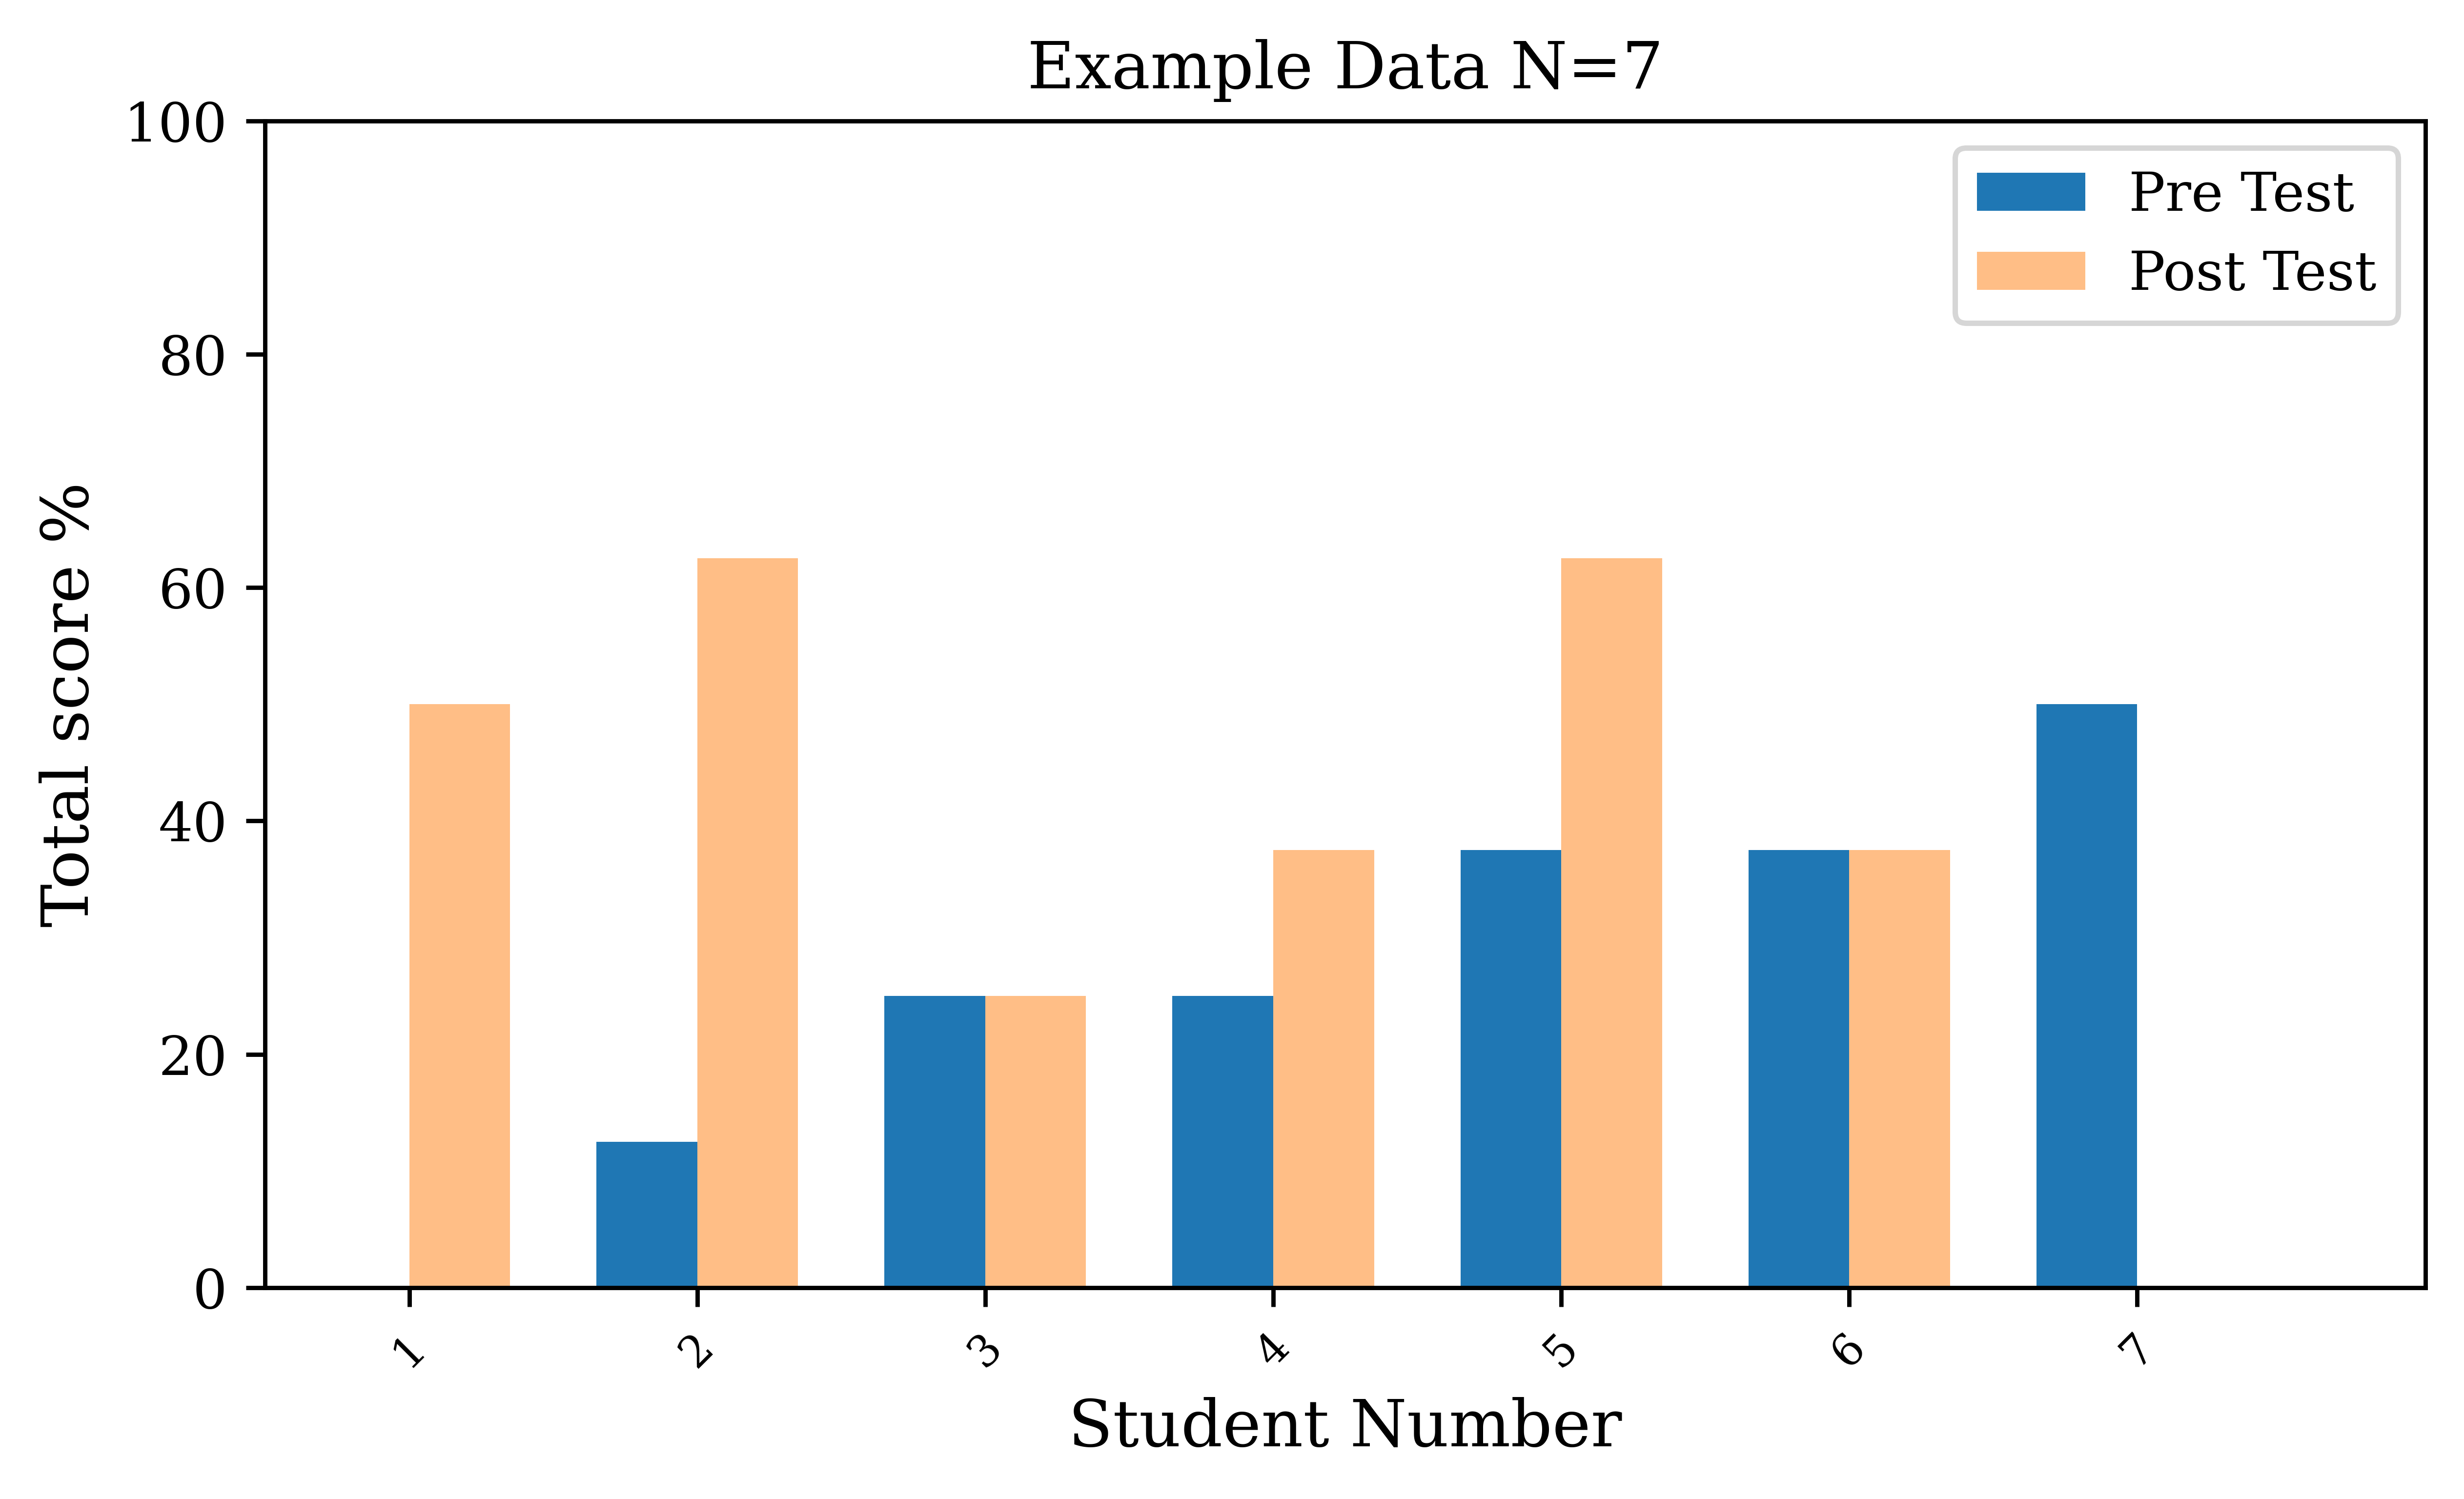

In [68]:
filename = 'Plots/...'
preData = percentage_Pre
postData = percentage_Post

l_label = list(range(1,len(postData)+1))

titleString = f'Example Data N={len(postData)}'
Export = 'N'

ticks = list(range(0,len(postData)))
x = np.arange(len(postData.index))  # the label locations

fig, ax = plt.subplots()
ax.bar(preData.index, preData, width = -0.35, align = 'edge', label = 'Pre Test')
ax.bar(postData.index, postData, width = 0.35, align = 'edge', label = 'Post Test', alpha = 0.5)

ax.set_ylabel('Total score %', size = 12)
ax.set_xlabel('Student Number')#s ordered by total score')
ax.set_xticks(ticks)
ax.tick_params(axis='y', which='major', labelsize=10)
ax.set_xticklabels(l_label,rotation =45, fontsize = 8)


ax.set_ylim([0,100])
ax.set_xlim([-0.5, len(postData)])
ax.legend(fontsize = 10, markerscale = 0.1)#bbox_to_anchor = (2, 1),loc = 'upper right')

plt.title(titleString, size = 12)
plt.tight_layout()


if Export =='Y':
    plt.savefig(filename, format = 'png')
    

## Total % score T2 Pre Test Class separated

## ZScore plots

In [69]:
## Calculate Z score for each class and overall

zScoreC1_Pre = scipy.stats.zscore(C1_Pre)
zScoreC1_Post = scipy.stats.zscore(C1_Post)

zScoreTotal_Pre = scipy.stats.zscore(dfScores_Pre['Total score'])
zScoreTotal_Post = scipy.stats.zscore(dfScores_Post['Total score'])

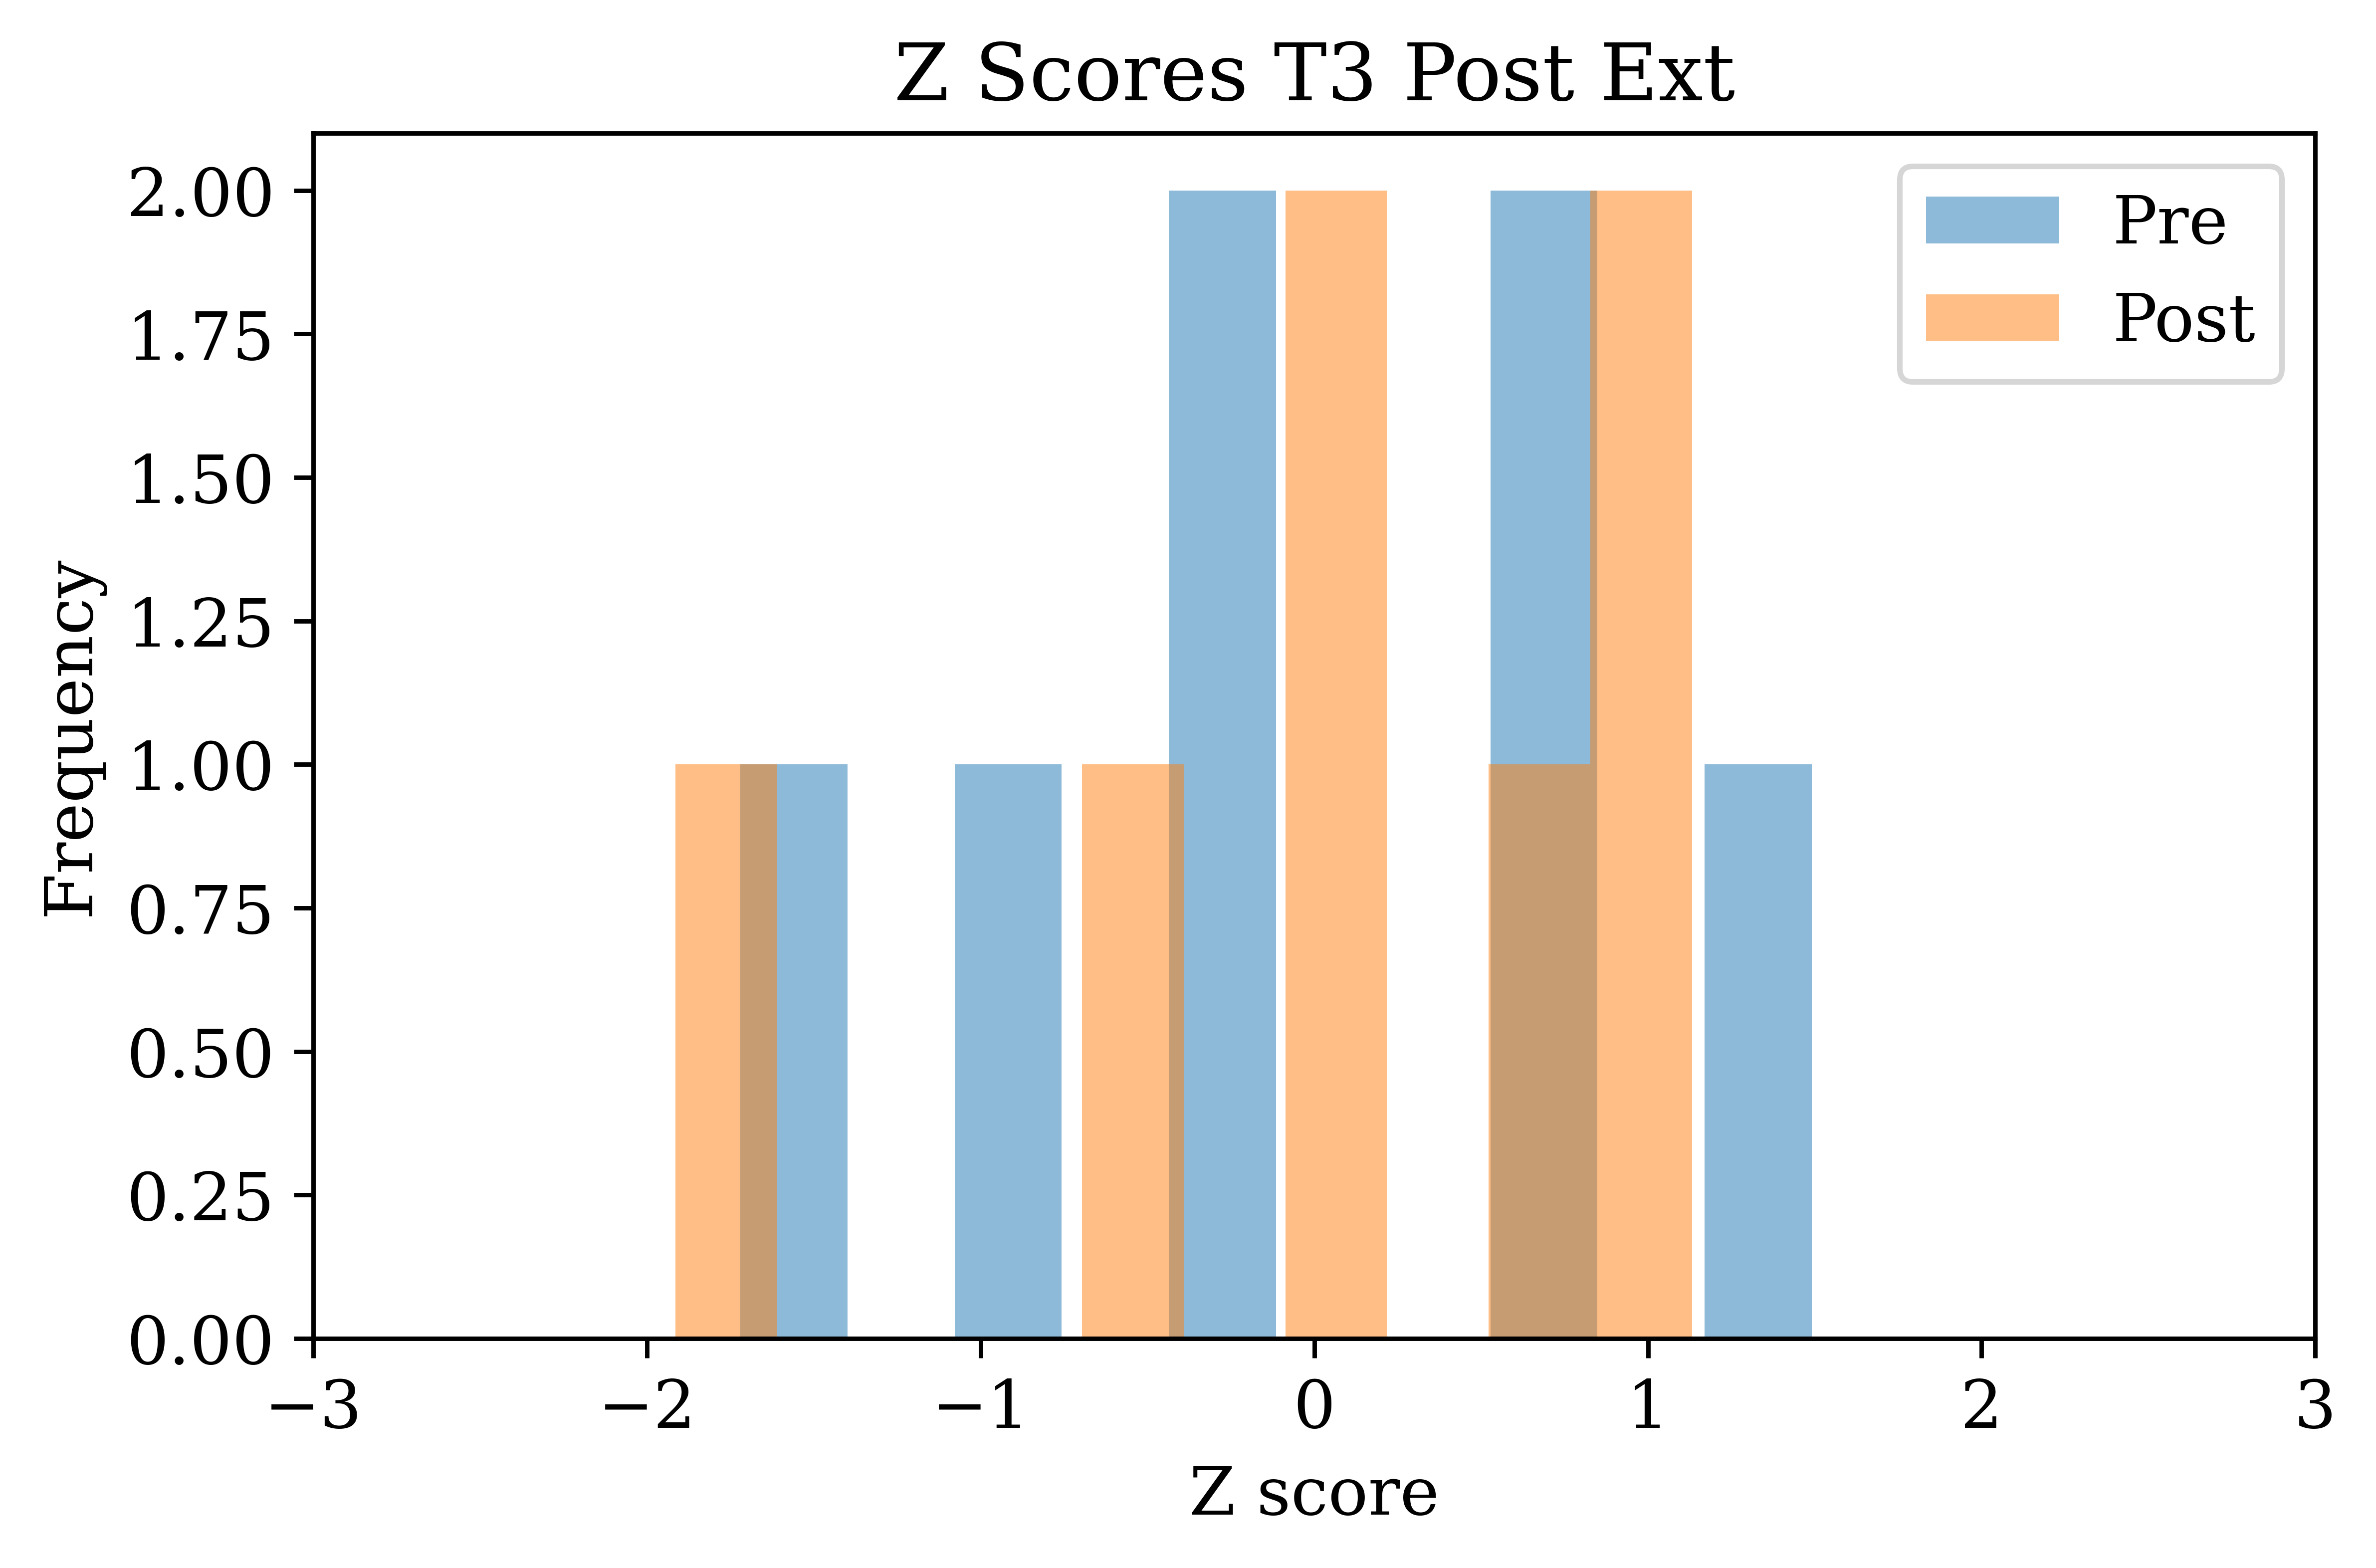

In [72]:

Export = 'N'
plt.hist(zScoreTotal_Pre, alpha = 0.5, label = 'Pre')
plt.hist(zScoreTotal_Post, alpha = 0.5, label = 'Post')


plt.xlim([-3, 3])
plt.legend()
plt.title('Z Scores T3 Post Ext')
plt.ylabel('Frequency')
plt.xlabel('Z score')

if Export == 'Y':
    plt.savefig('Plots/Processed_Data/Z_Score_percentage_T3_Ext_post', format = 'jpg')

## Box Plots by classes

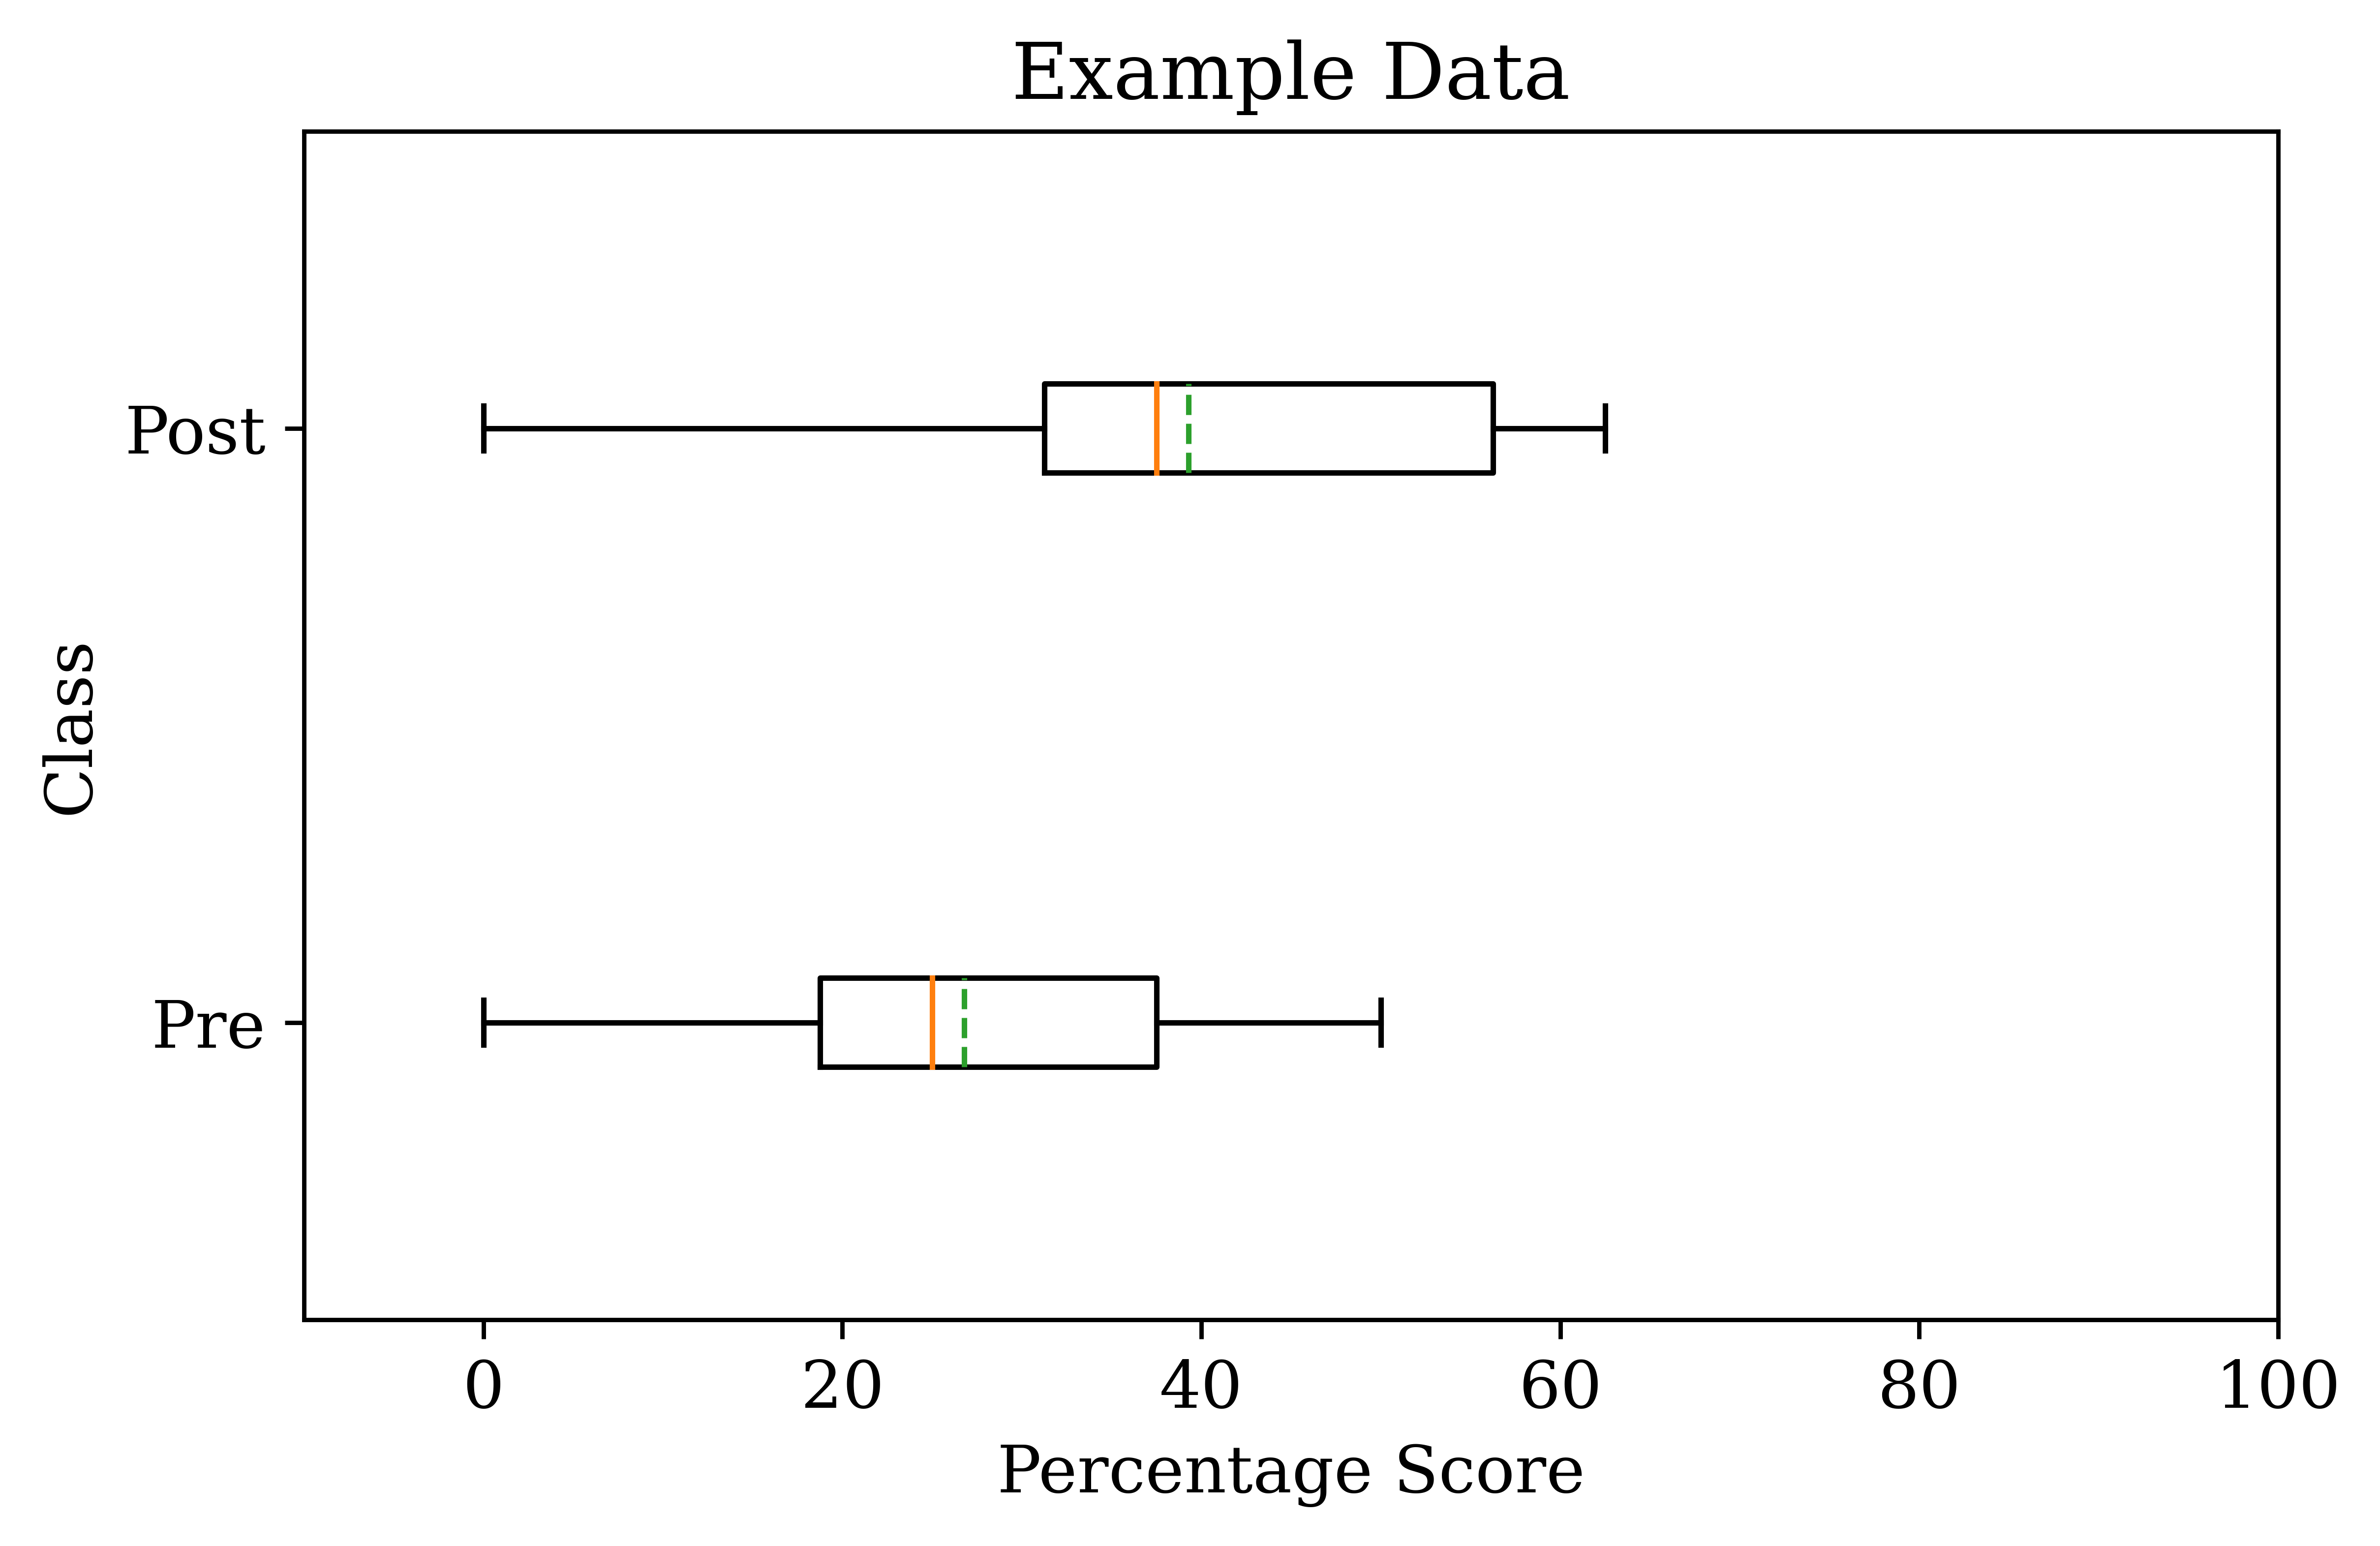

In [81]:
Export = 'N'
TotalScores = [percentage_Pre, percentage_Post]#[C1_Pre_T2, C2_Pre_T2, C3_Pre_T2]
plt.boxplot(TotalScores, meanline = True, showmeans = True, vert = False)
plt.xlabel('Percentage Score')
plt.ylabel('Class')
plt.xlim([-10, 100])
plt.yticks(ticks = [1,2], labels = ['Pre', 'Post'])#'Ext', 'GAT', 'Gen'])
# plt.savefig('Box plot - separated by classes.png')
plt.title('Example Data')

if Export == 'Y':
    plt.savefig('Plots/Processed_Data/Box_plot_percentage_post_T3_Ext', format = 'eps')

### Correlation Fn

In [84]:
import seaborn as sns

In [82]:
Test = dfScores_Post
Index = Marks_Post

x_labels = []
for value in Index.keys():
    x_labels.append(value)


Data = Test.drop(['Total score'], axis = 1)

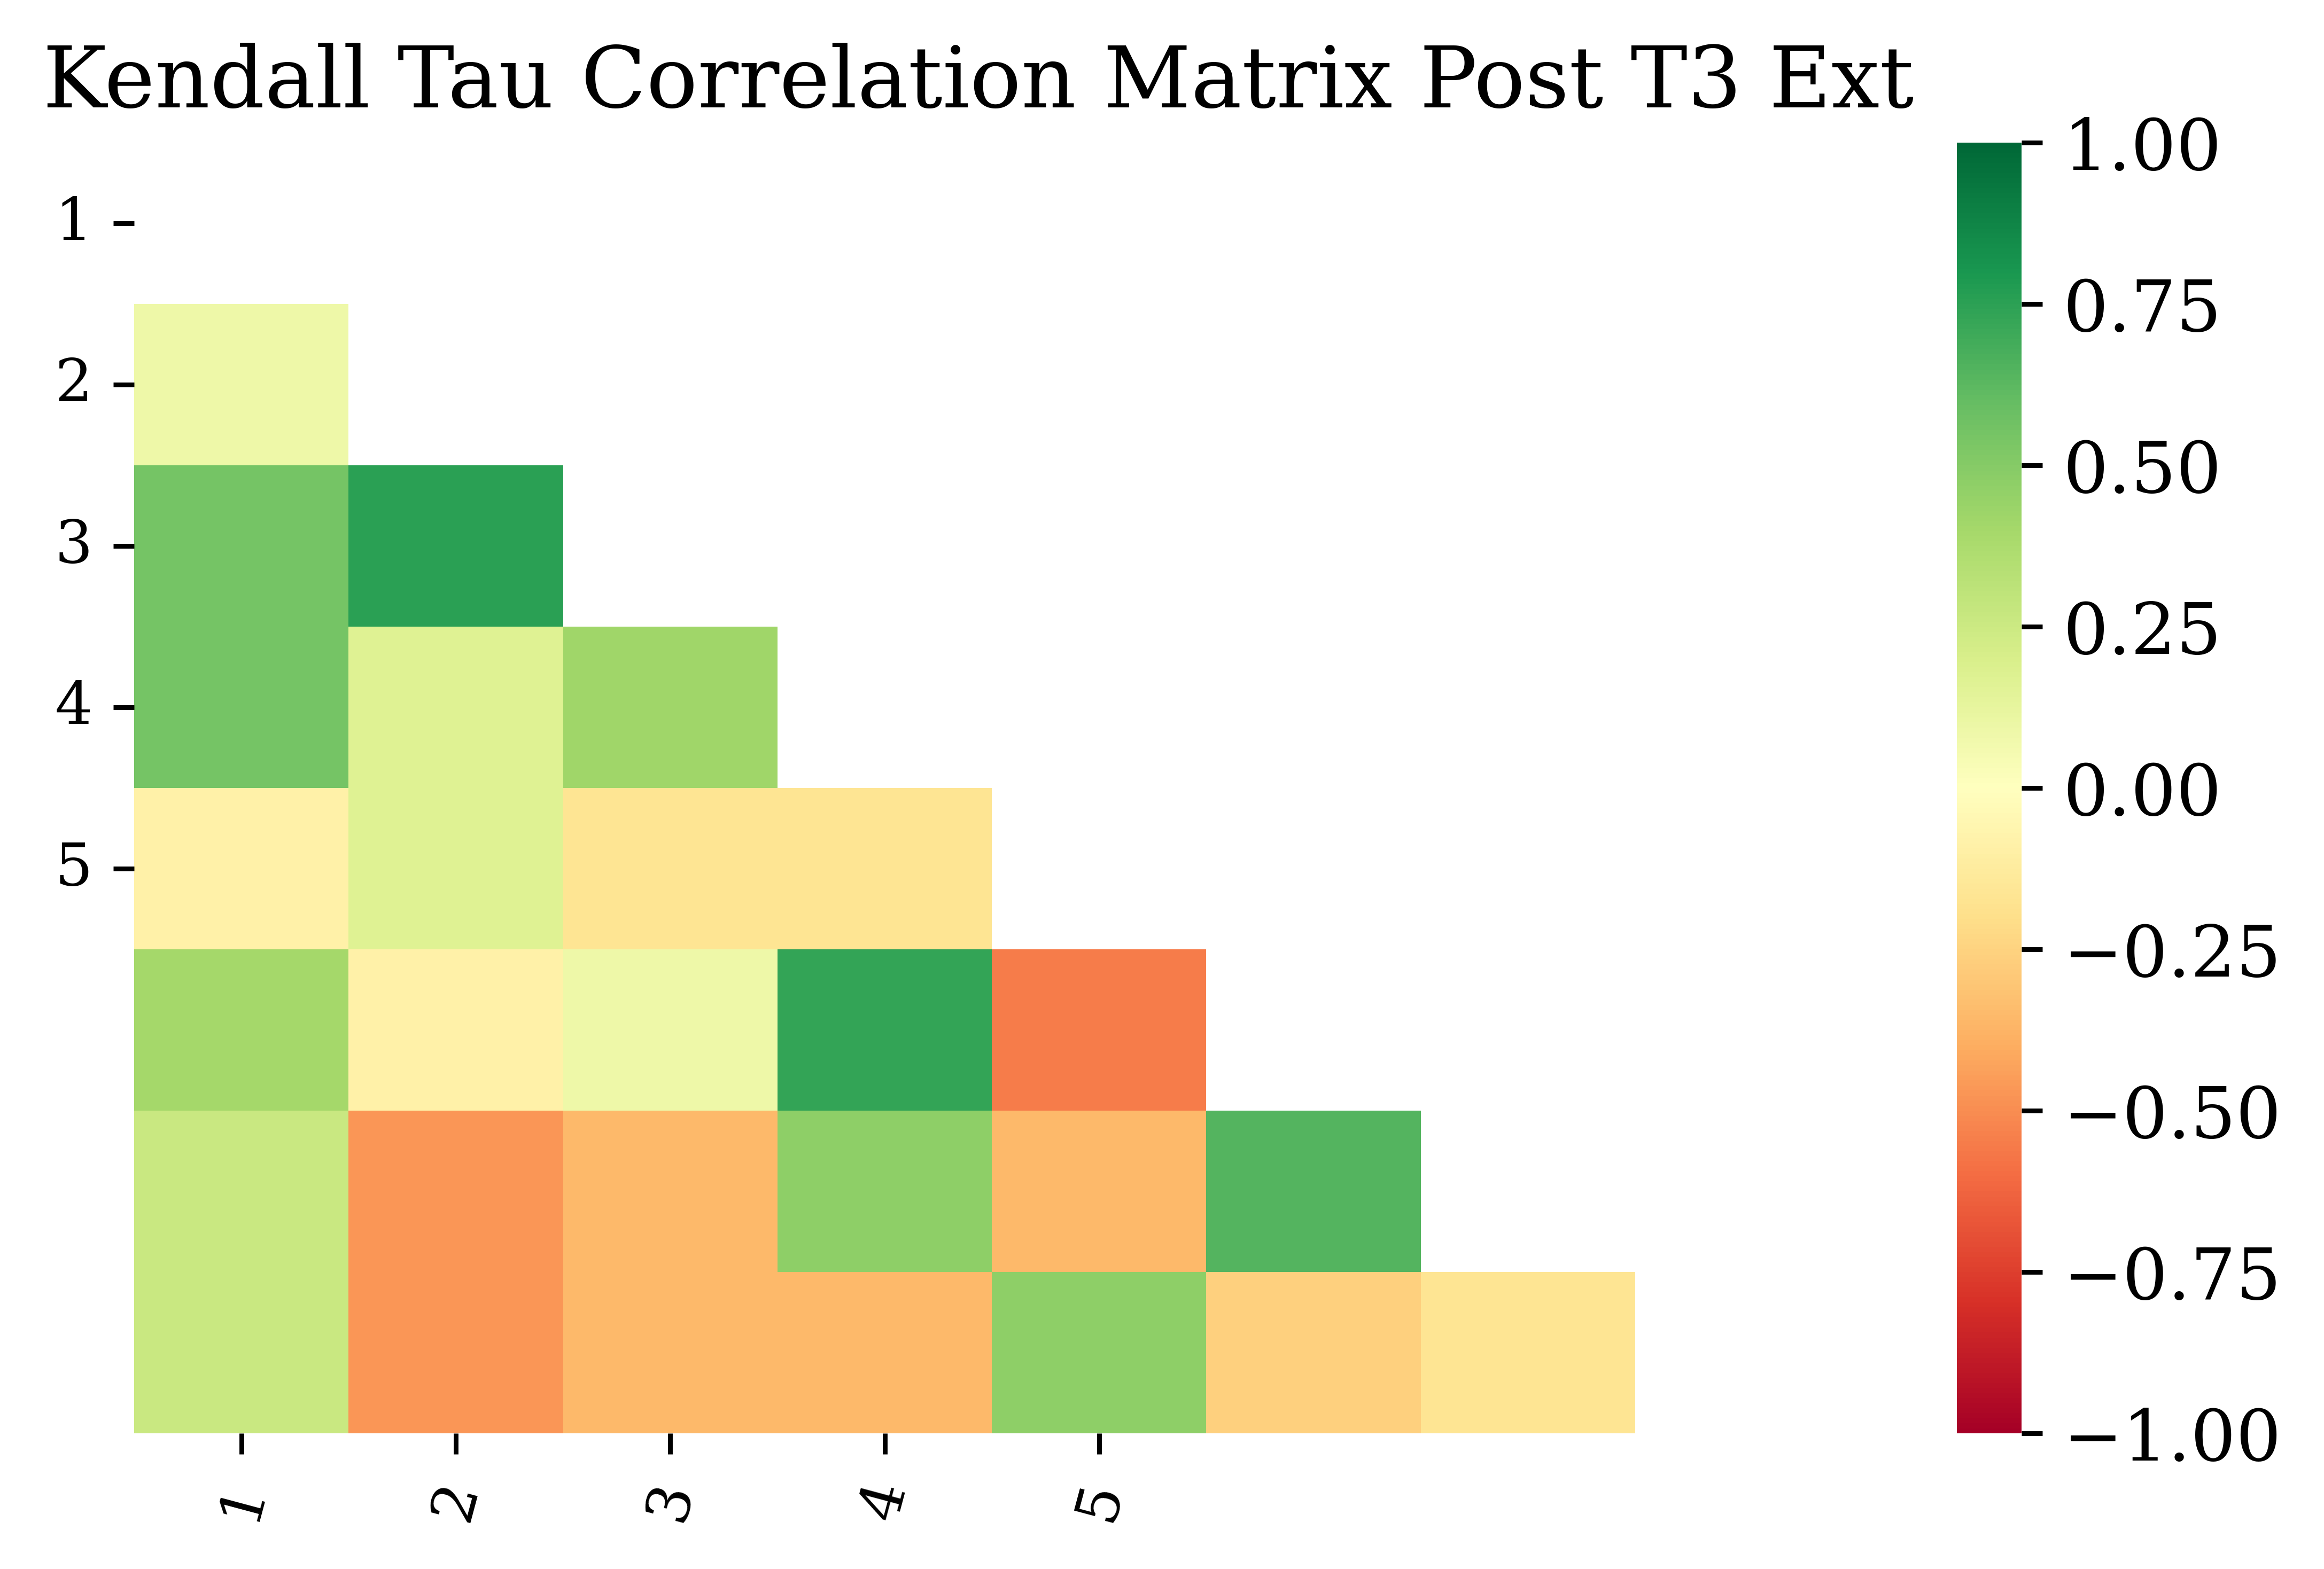

In [85]:
matrix = Data.corr(method = 'kendall')
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, cmap = 'RdYlGn', vmin = -1, vmax = 1, mask = mask, center = 0)
plt.tick_params(axis='x', rotation=55)
# plt.colorbar()
plt.xticks(np.arange(0,len(x_labels),1)+0.5, x_labels, rotation = 75, fontsize = 10)
plt.yticks(np.arange(0,len(x_labels),1)+0.5, x_labels, rotation = 0, fontsize = 10)
# plt.yticklabels(x_labels, rotation =0, fontsize = 12)

plt.title('Kendall Tau Correlation Matrix Post T3 Ext ')

Export = 'N'
if Export == 'Y':
    plt.savefig('Plots/Processed_Data/Kendall_Tau_Post_T3_Ext', format = 'eps')

plt.show()

## Plot the Guttman pattern

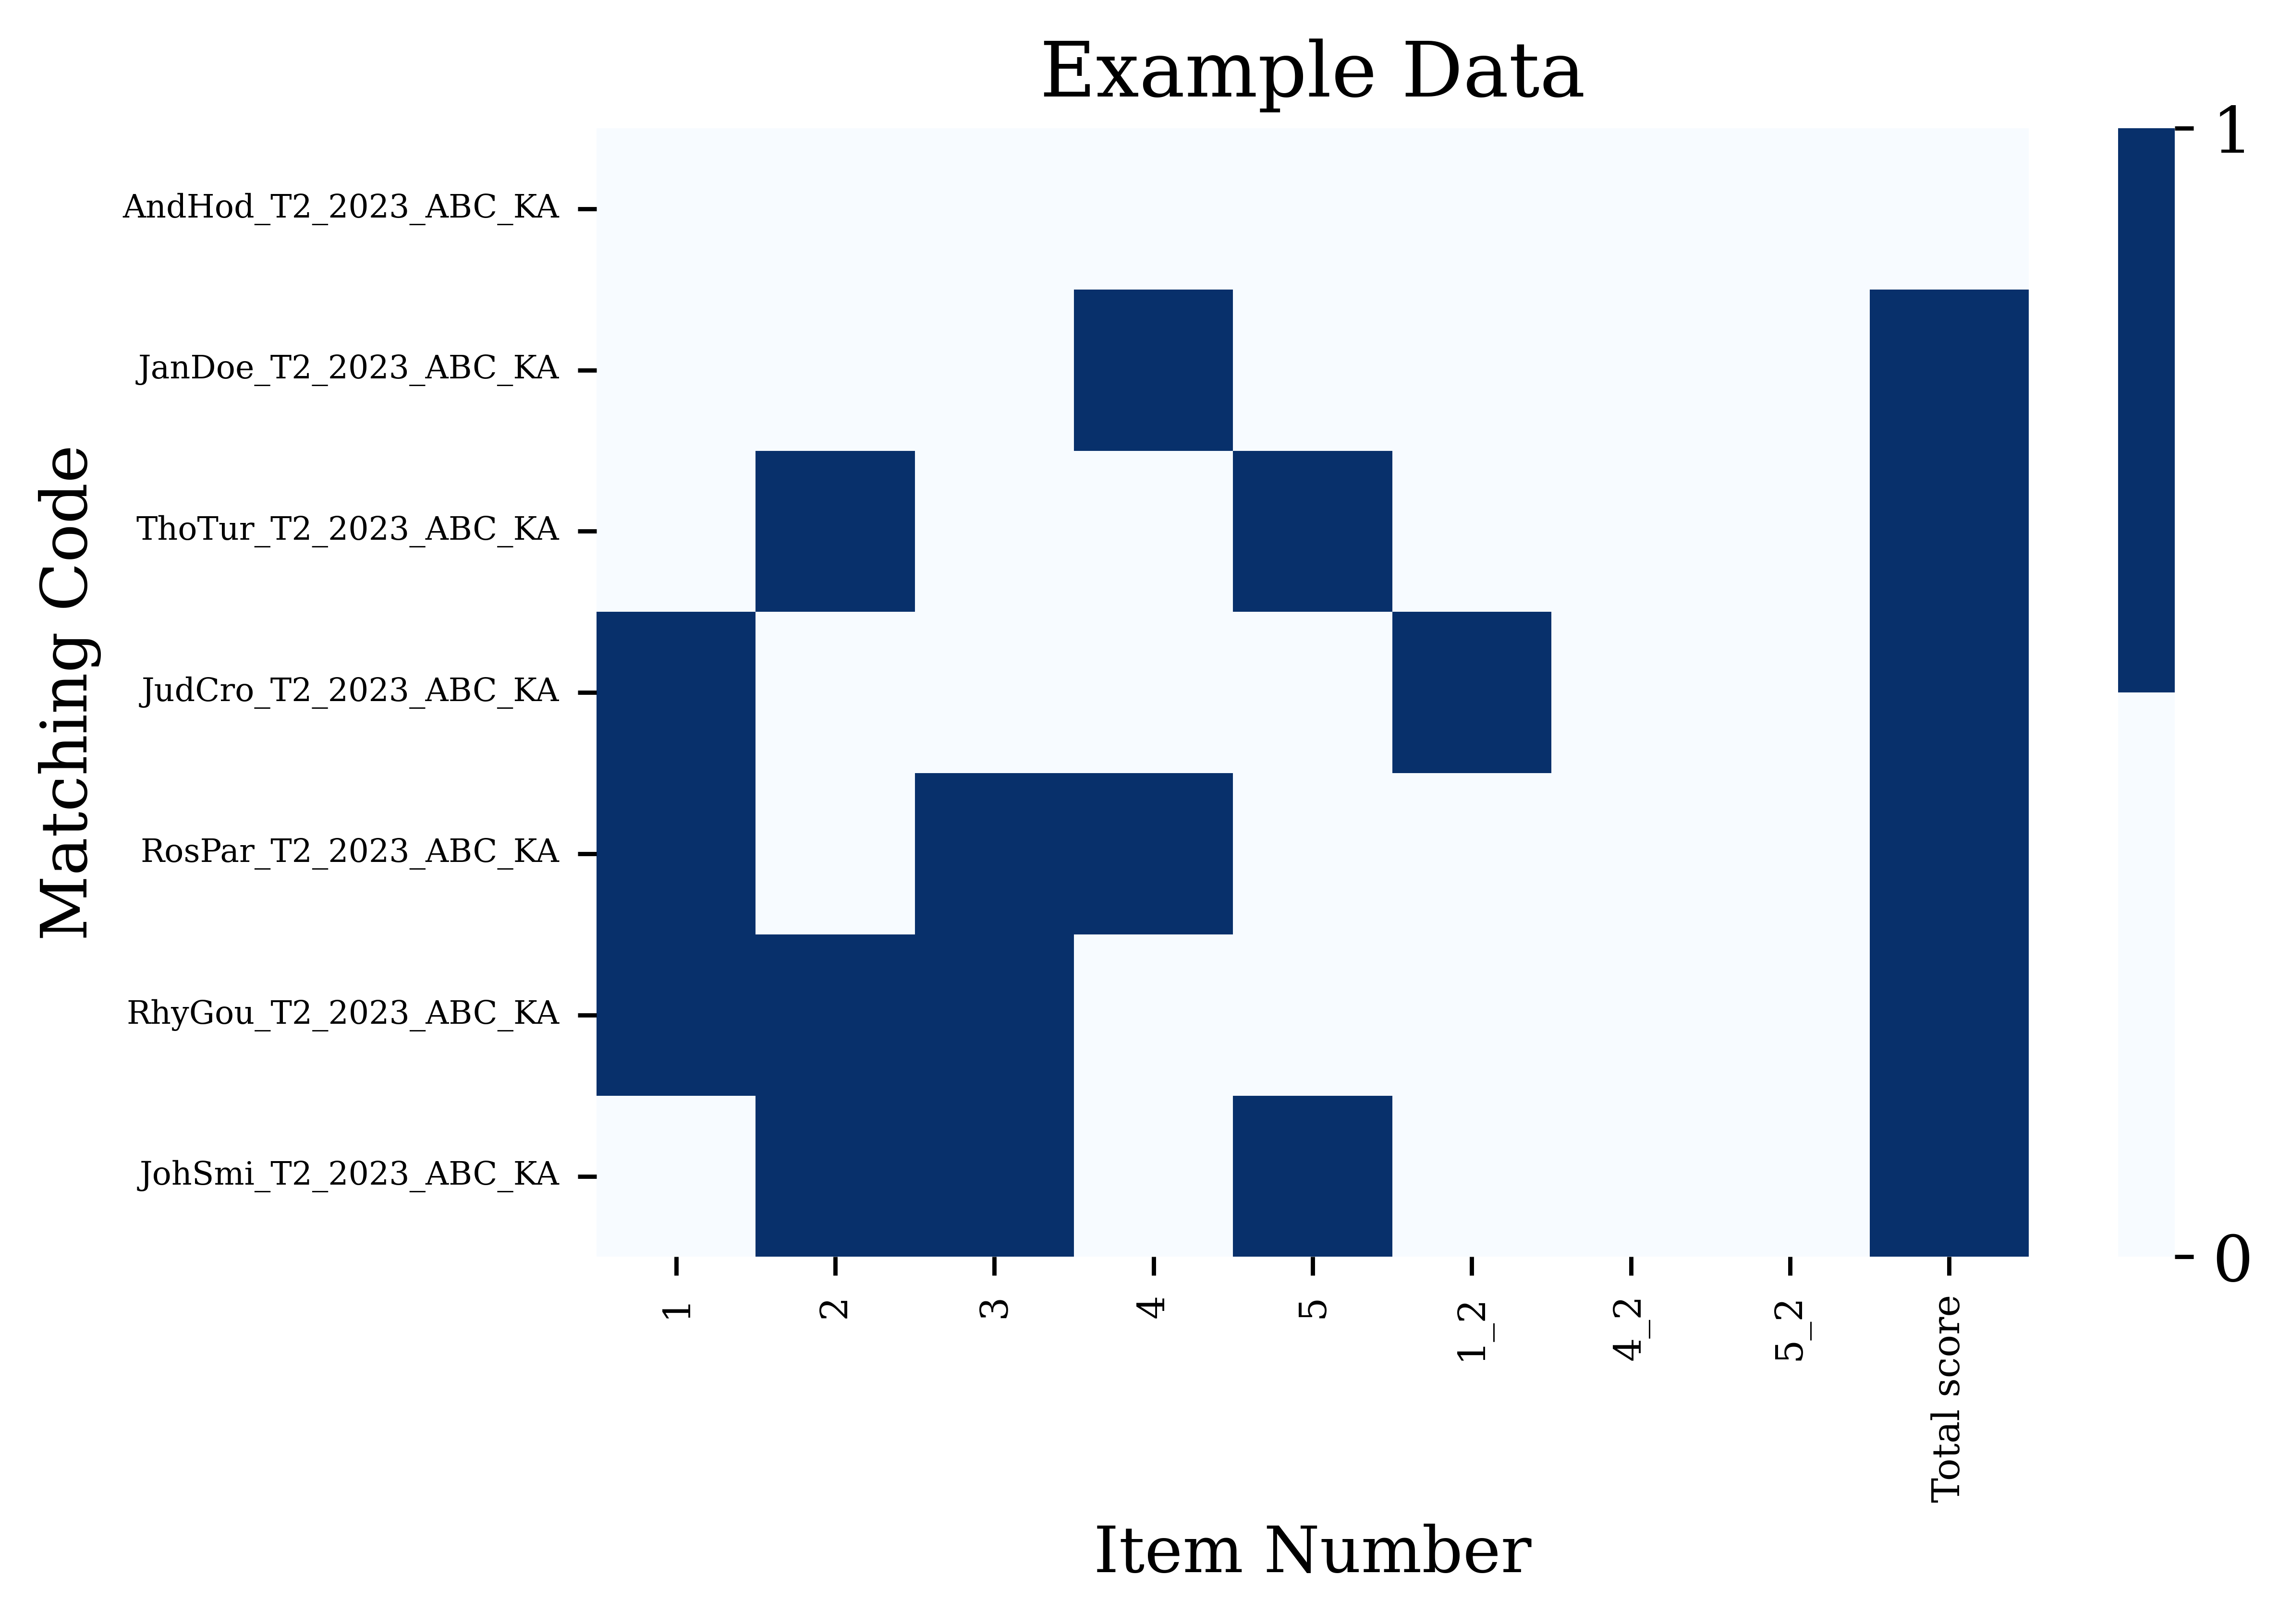

In [87]:
Data = dfScores_Pre
sns.heatmap(Data, cmap =plt.cm.get_cmap('Blues', 2), vmax = 1, cbar_kws = {'ticks': [0,1]})
plt.xticks(np.arange(0,len(Data.columns),1)+0.5, Data.columns, rotation = 90, fontsize = 7)
plt.yticks(rotation = 0, fontsize = 6)
plt.tight_layout()
plt.ylabel('Matching Code', size = 12)
plt.xlabel('Item Number', size = 12)

plt.title('Example Data')

Export = 'N'
if Export == 'Y':
    plt.savefig('Plots/Processed_Data/GP_Post_T2_2023.png', format = 'png')
plt.show()

#sns.color_palette("icefire", as_cmap=True)